<a href="https://colab.research.google.com/github/fcignoli/horneros/blob/main/horneros_sintesis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import numpy as np
from scipy.signal import hilbert, find_peaks
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from scipy import signal
from scipy.ndimage import gaussian_filter1d


import seaborn as sns
sns.set_theme(style="whitegrid")

Mounted at /content/drive


In [3]:
 samplerate, data_sonido = wavfile.read('/content/drive/My Drive/horneros (drive)/Sintesis/Audios para probar/HA061020041409-solo_hembra_recorte.wav')


#HA061020041409-solo_hembra_recorte.wav

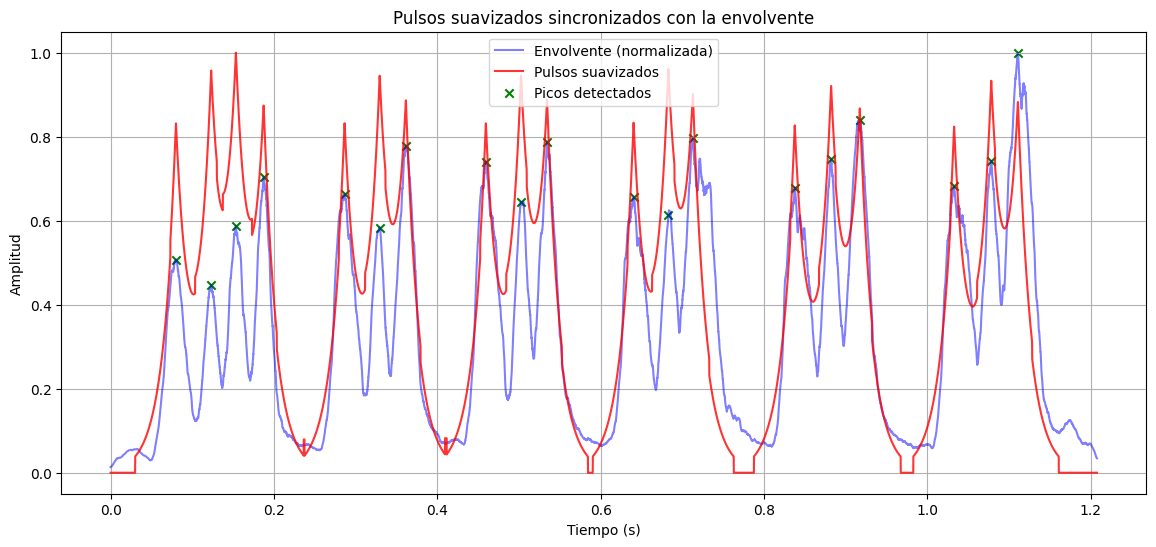

In [ ]:
# @title Pulsos que siguen a la envolvente
"""
# Define the period of the function
period = 4000

# Create a time vector with integer multiples of 1/samplerate
time = np.arange(len(data_sonido)) / samplerate

# 1. Calcular la envolvente de la señal de sonido
senal_analitica = hilbert(data_sonido)
envolvente = np.abs(senal_analitica)
envolvente_suavizada = np.convolve(envolvente, np.ones(700)/700, mode='same')  # Suavizado inicial

# 2. Detectar picos
peaks, _ = find_peaks(
    envolvente_suavizada,
    distance=int(samplerate * 0.03),  # Distancia mínima entre pulsos (ej. 30ms)
    height=1.2 * np.mean(envolvente)   # Altura mínima relativa
)

# 3. Generar pulsos suavizados
z = np.zeros(len(data_sonido))
pulse_width = int(samplerate * 0.05)  # Ancho del pulso en muestras (ej. 50ms)

for peak in peaks:
    # Crear un pulso Gaussiano centrado en el pico
    #pulse = np.exp(-np.linspace(-3, 3, 2*pulse_width)**2)  # Perfil Gaussiano
    pulse = np.exp(-np.abs(np.linspace(-3, 3, 2*pulse_width)))  # Decaimiento exponencial
    start = max(0, peak - pulse_width)
    end = min(len(z), peak + pulse_width)

    # Asegurarse de que los índices estén dentro de los límites
    if start < end:
        pulse = pulse[-(end - start):] if (peak + pulse_width) > len(z) else pulse[:end - start]
        z[start:end] += pulse * 0.8  # Escalar la amplitud del pulso

# Normalizar la señal z
z = z / np.max(z) if np.max(z) > 0 else z

# 4. Visualización
plt.figure(figsize=(14, 6))
plt.plot(time, envolvente_suavizada / np.max(envolvente_suavizada), 'b-', alpha=0.5, label='Envolvente (normalizada)')
plt.plot(time, z, 'r-', alpha=0.8, label='Pulsos suavizados')
plt.scatter(peaks/samplerate, envolvente_suavizada[peaks]/np.max(envolvente_suavizada),
            c='green', marker='x', label='Picos detectados')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Pulsos suavizados sincronizados con la envolvente')
plt.legend()
plt.grid(True)
plt.show()

#z=envolvente_suavizada/max(envolvente_suavizada)

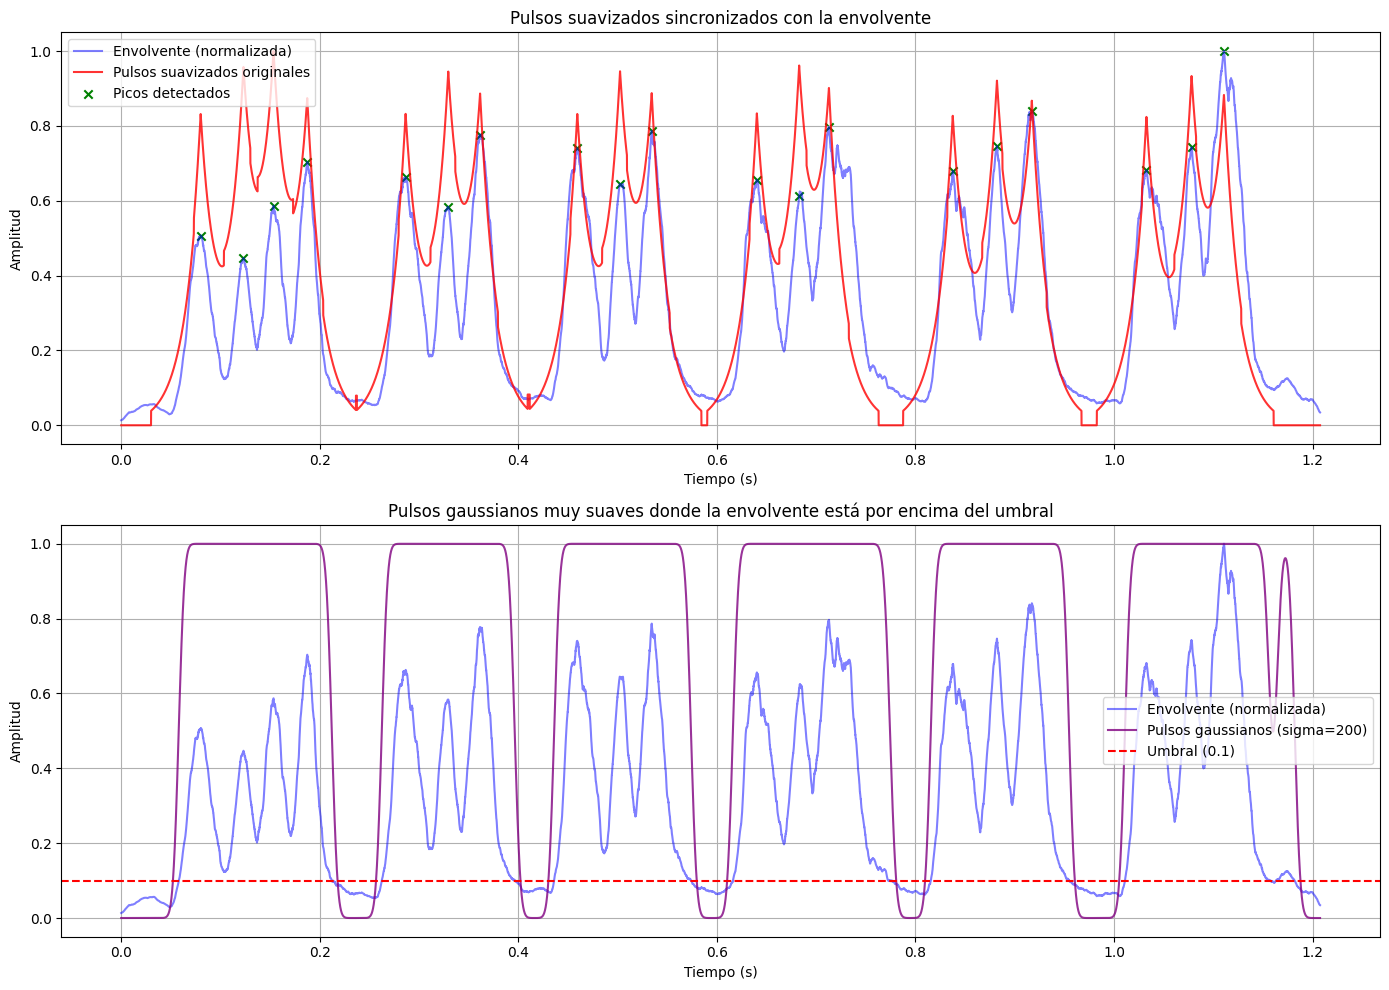

In [ ]:
# @title Señal activa tipo gaussiana
# DETECTAR LOS PICOS DE LA ENVOLVENTE Y GENERAR UNA SEÑAL QUE ESTE ACTIVA DONDE LA ENVOLVENTE ESTA ACTIVA Y ANULADA DONDE LA ENVOLVENTE ESTA ANULADA

# PULSO GAUSSIANOS --> DABA UN POCO PEOR
 """
def generar_pulsos_gaussianos(señal_original, umbral=0.1, amplitud_pulso=1.0, sigma=80):
    """   """
    Genera pulsos gaussianos muy suaves en las regiones donde la señal original está activa.

    Parámetros:
    - señal_original: Array de numpy con la señal original
    - umbral: Valor por encima del cual se considera que la señal original está activa
    - amplitud_pulso: Amplitud máxima de los pulsos generados
    - sigma: Parámetro de suavizado gaussiano (mayor valor = pulsos más suaves)

    Salida:
    - pulsos_gaussianos: Array de numpy con los pulsos gaussianos
    """   """
    # Normalizar la señal original para comparación consistente con el umbral
    señal_norm = señal_original / np.max(señal_original) if np.max(señal_original) > 0 else señal_original

    # Crear una máscara binaria donde la señal original es considerada activa (mayor que el umbral)
    mascara_activa = (señal_norm > umbral).astype(float)

    # Aplicar filtro gaussiano a la máscara para crear pulsos muy suaves
    pulsos_gaussianos = gaussian_filter1d(mascara_activa, sigma=sigma) * amplitud_pulso

    return pulsos_gaussianos

# Define the period of the function
period = 4000

# Create a time vector with integer multiples of 1/samplerate
time = np.arange(len(data_sonido)) / samplerate

# 1. Calcular la envolvente
senal_analitica = hilbert(data_sonido)
envolvente = np.abs(senal_analitica)
envolvente_suavizada = np.convolve(envolvente, np.ones(700)/700, mode='same')  # Suavizado inicial

# 2. Detectar picos
peaks, _ = find_peaks(
    envolvente_suavizada,
    distance=int(samplerate * 0.03),  # Distancia mínima entre pulsos (ej. 30ms)
    height=1.2 * np.mean(envolvente)   # Altura mínima relativa
)

# 3. Generar pulsos suavizados
z = np.zeros(len(data_sonido))
pulse_width = int(samplerate * 0.05)  # Ancho del pulso en muestras (ej. 50ms)

for peak in peaks:
    # Crear un pulso con decaimiento exponencial centrado en el pico
    pulse = np.exp(-np.abs(np.linspace(-3, 3, 2*pulse_width)))  # Decaimiento exponencial
    start = max(0, peak - pulse_width)
    end = min(len(z), peak + pulse_width)

    # Asegurarse de que los índices estén dentro de los límites
    if start < end:
        pulse = pulse[-(end - start):] if (peak + pulse_width) > len(z) else pulse[:end - start]
        z[start:end] += pulse * 0.8  # Escalar la amplitud del pulso

# Normalizar la señal z
z = z / np.max(z) if np.max(z) > 0 else z

# Generar pulsos gaussianos muy suaves que coinciden con la activación de la envolvente
env_normalizada = envolvente_suavizada / np.max(envolvente_suavizada)
umbral_activacion = 0.10  # Ajusta este valor según necesites
sigma_gaussiano = 200     # Valor alto para pulsos muy suaves

# Generar los pulsos gaussianos
pulsos_gaussianos = generar_pulsos_gaussianos(
    env_normalizada,
    umbral=umbral_activacion,
    amplitud_pulso=1.0,
    sigma=sigma_gaussiano
)

# 4. Visualización
plt.figure(figsize=(14, 7))


# Plot: Envolvente y pulsos gaussianos

plt.plot(time, env_normalizada, 'b-', alpha=0.5, label='Envolvente (normalizada)')
plt.plot(time, pulsos_gaussianos, 'purple', alpha=0.8, label=f'Pulsos gaussianos (sigma={sigma_gaussiano})')
plt.axhline(y=umbral_activacion, color='r', linestyle='--', label=f'Umbral ({umbral_activacion})')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Pulsos gaussianos muy suaves donde la envolvente está por encima del umbral')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Guardar los pulsos gaussianos como resultado final
pulsos_finales = pulsos_gaussianos


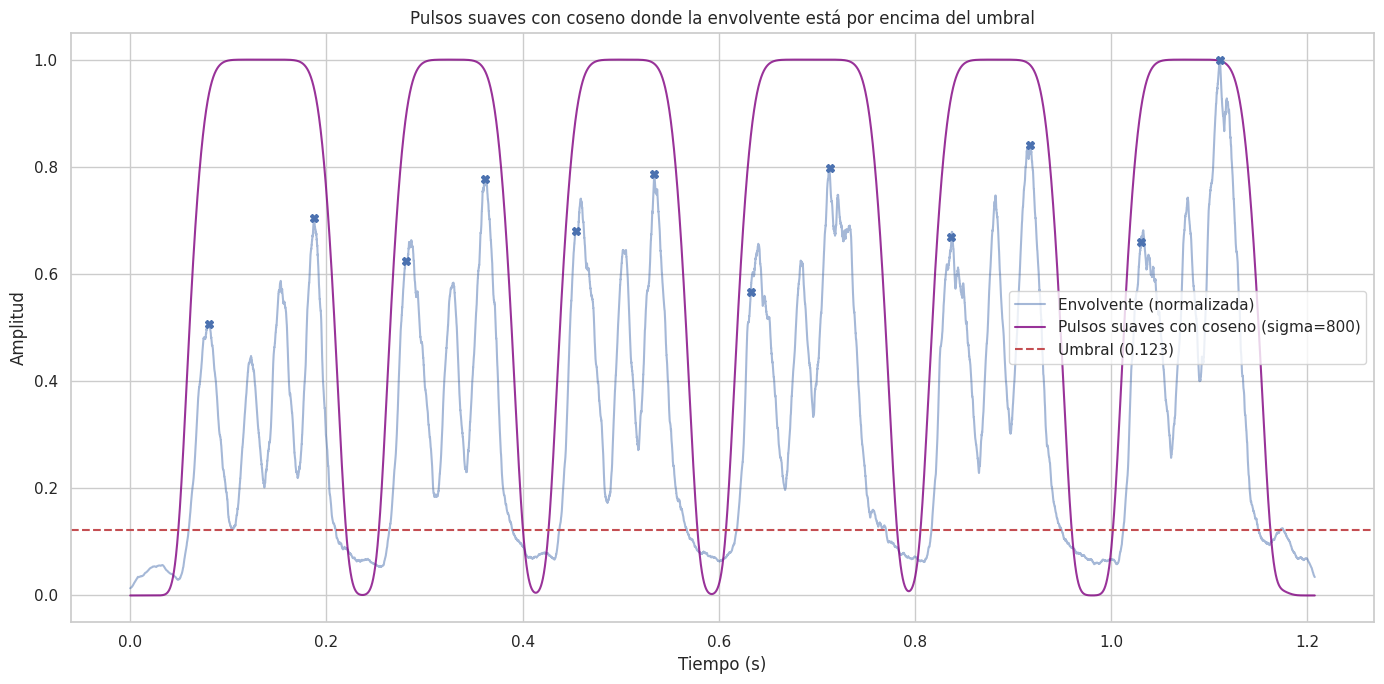

In [40]:
#####################################################
# DETECTAR LOS PICOS DE LA ENVOLVENTE Y GENERAR UNA SEÑAL QUE ESTE ACTIVA DONDE LA ENVOLVENTE ESTA ACTIVA Y ANULADA DONDE LA ENVOLVENTE ESTA ANULADA
#####################################################

# PULSO TIPO COSENO --- FUNCIONA MEJOR CON ESTOS
#def generar_pulsos_coseno(señal_original, umbral=0.1, sigma=80):
 #   señal_norm = señal_original / np.max(señal_original) if np.max(señal_original) > 0 else señal_original
  #  mascara_binaria = (señal_norm > umbral).astype(float)
  #  mascara_suave = gaussian_filter1d(mascara_binaria, sigma=sigma)
   # pulsos = 0.5 * (1 - np.cos(np.pi * np.clip(mascara_suave, 0, 1)))  # tipo "raised cosine"
    #return pulsos

def generar_pulsos_coseno(señal_original, umbral=0.2, sigma=500, umbral_cero=0.1):
    """
    Versión con alto suavizado pero que garantiza ceros en zonas inactivas.

    Parámetros:
    - umbral_cero: Valores por debajo de este umbral se fuerzan a cero.
                  (Ajusta este valor según tus necesidades, ej: 0.001, 0.0001, etc.)
    """
    señal_norm = señal_original / np.max(señal_original) if np.max(señal_original) > 0 else señal_original
    mascara_binaria = (señal_norm > umbral).astype(float)

    # Aplicamos el filtro gaussiano (suavizado fuerte)
    mascara_suave = gaussian_filter1d(mascara_binaria, sigma=sigma)

    # Identificamos las regiones donde la máscara binaria original era cero
    regiones_inactivas = (mascara_binaria == 0)

    # Forzamos a cero en esas regiones, pero permitimos pequeñas transiciones suaves
    mascara_suave[regiones_inactivas & (mascara_suave < umbral_cero)] = 0

    # Normalizamos para mantener el rango [0, 1]
    if np.max(mascara_suave) > 0:
        mascara_suave = mascara_suave / np.max(mascara_suave)

    # Generamos el pulso cosenoidal
    pulsos = 0.5 * (1 - np.cos(np.pi * mascara_suave))
    pulsos = gaussian_filter1d(pulsos, sigma=300)

    return pulsos

# Define the period of the function
period = 4000

# Asumiendo que data_sonido y samplerate están definidos anteriormente
# Create a time vector with integer multiples of 1/samplerate
time = np.arange(len(data_sonido)) / samplerate

# 1. Calcular la envolvente
senal_analitica = hilbert(data_sonido)
envolvente = np.abs(senal_analitica)
envolvente_suavizada = np.convolve(envolvente, np.ones(700)/700, mode='same')  # Suavizado inicial

# 2. Detectar picos (ajusta estos parámetros según tu audio)
peaks, _ = find_peaks(
    envolvente_suavizada,
    distance=int(samplerate * 0.08),  # Distancia mínima entre pulsos (ej. 30ms)
    height=1.2 * np.mean(envolvente)   # Altura mínima relativa
)

# 3. Generar pulsos suavizados (tipo original con decaimiento exponencial)
z = np.zeros(len(data_sonido))
pulse_width = int(samplerate * 0.05)  # Ancho del pulso en muestras (ej. 50ms)

for peak in peaks:
    pulse = np.exp(-np.abs(np.linspace(-1, 1, 2*pulse_width)))  # Decaimiento exponencial
    start = max(0, peak - pulse_width)
    end = min(len(z), peak + pulse_width)
    if start < end:
        pulse = pulse[-(end - start):] if (peak + pulse_width) > len(z) else pulse[:end - start]
        z[start:end] += pulse * 0.8

z = z / np.max(z) if np.max(z) > 0 else z

# 4. Generar pulsos con función coseno suave
env_normalizada = envolvente_suavizada / np.max(envolvente_suavizada)
umbral_activacion = 0.1230
sigma_coseno = 800
umbral_cero=0.35

pulsos_coseno = generar_pulsos_coseno(
    env_normalizada,
    umbral=umbral_activacion,
    sigma=sigma_coseno,
    umbral_cero = umbral_cero
)

# 5. Visualización
plt.figure(figsize=(14, 7))

plt.plot(time, env_normalizada, 'b-', alpha=0.5, label='Envolvente (normalizada)')
plt.plot(time, pulsos_coseno, 'purple', alpha=0.8, label=f'Pulsos suaves con coseno (sigma={sigma_coseno})')
plt.plot(time[peaks], env_normalizada[peaks], 'X')
plt.axhline(y=umbral_activacion, color='r', linestyle='--', label=f'Umbral ({umbral_activacion})')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Pulsos suaves con coseno donde la envolvente está por encima del umbral')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Guardar los pulsos como resultado final
pulsos_finales = pulsos_coseno
z = pulsos_coseno

In [ ]:
# @title enfoque mas simple
# Define the period of the function
period = 4000

# Asumiendo que data_sonido y samplerate están definidos anteriormente
# Create a time vector with integer multiples of 1/samplerate
time = np.arange(len(data_sonido)) / samplerate

# 1. Calcular la envolvente
senal_analitica = hilbert(data_sonido)
envolvente = np.abs(senal_analitica)
envolvente_suavizada = np.convolve(envolvente, np.ones(700)/700, mode='same')  # Suavizado inicial

# 2. Detectar picos (ajusta estos parámetros según tu audio)
peaks, _ = find_peaks(
    envolvente_suavizada,
    distance=int(samplerate * 0.08),  # Distancia mínima entre pulsos (ej. 30ms)
    height=1.2 * np.mean(envolvente)   # Altura mínima relativa
)


def campanas_seno(t, puntos):
    """
    Genera la suma de campanas seno entre intervalos definidos en puntos.

    t: escalar o array de tiempos
    puntos: array plano con pares (t_inicial_j, t_final_j)
    """

    resultado = np.zeros_like(t, dtype=float)

    for j in range(0, len(puntos), 2):
        t_ini = puntos[j]
        t_fin = puntos[j+1]
        dur = t_fin - t_ini

        # Máscara para los t dentro del intervalo actual
        mascara = (t >= t_ini) & (t <= t_fin)
        t_local = t[mascara]

        # Campana en ese intervalo
        resultado[mascara] += np.sin(np.pi * (t_local - t_ini) / dur)
    return resultado

def campanas_seno_ajustadas(t, puntos, amplitud=0):
    """
    Genera campanas seno donde los puntos definidos corresponden a la amplitud dada (ej: 0.3).

    t: array de tiempos
    puntos: array con pares (t_inicial_j, t_final_j)
    amplitud: valor deseado en los extremos (debe ser entre 0 y 1)
    """
    resultado = np.zeros_like(t, dtype=float)
    phi_0 = np.arcsin(amplitud)  # Ángulo donde sin(phi) = amplitud

    for j in range(0, len(puntos), 2):
        t_ini = puntos[j]
        t_fin = puntos[j+1]
        dur = t_fin - t_ini

        # Mapear t_local desde [t_ini, t_fin] a [phi_0, pi - phi_0]
        mascara = (t >= t_ini) & (t <= t_fin)
        t_local = t[mascara]

        # Normalizar el tiempo y ajustar la fase
        t_normalizado = (t_local - t_ini) / dur  # va de 0 a 1
        fase = phi_0 + t_normalizado * (np.pi - 2 * phi_0)  # va de phi_0 a pi - phi_0

        # Aplicar seno y sumar al resultado
        resultado[mascara] += np.sin(fase)

    return resultado


def campanas_seno_suavizado(t, puntos, k=1000, delta_factor=0.5):
    t = np.array(t)
    resultado = np.zeros_like(t, dtype=float)

    for j in range(0, len(puntos), 2):
        t_ini = puntos[j]
        t_fin = puntos[j+1]
        dur = t_fin - t_ini
        if dur <= 0:
            continue

        # Delta proporcional al ancho de la campana
        delta = delta_factor * dur

        # Intervalo extendido completo
        t_ini_ext = t_ini - delta
        t_fin_ext = t_fin + delta
        dur_total = t_fin_ext - t_ini_ext

        # Máscara para el intervalo extendido
        mascara = (t >= t_ini_ext) & (t <= t_fin_ext)
        t_local = t[mascara]

        # Campana seno completa en el intervalo extendido
        seno = np.sin(np.pi * (t_local - t_ini_ext) / dur_total)

        # Ventana sigmoidal
        subida = 1 / (1 + np.exp(-k * (t_local - t_ini)))
        bajada = 1 / (1 + np.exp(-k * (t_local - t_fin)))
        ventana = subida * (1 - bajada)

        # Calculamos el producto seno*ventana
        campana = seno * ventana

        # Normalizamos por el valor máximo absoluto para amplitud 1
        max_val = np.max(np.abs(campana))
        if max_val > 0:
            campana /= max_val

        resultado[mascara] += campana

    return resultado



z_aux = campanas_seno_suavizado(time, time[peaks])
z=z_aux/np.max(z_aux)

plt.figure(figsize=(14, 7))

env_normalizada = envolvente_suavizada / np.max(envolvente_suavizada)
plt.plot(time, env_normalizada, 'b-', alpha=0.5, label='Envolvente (normalizada)')
plt.plot(time, z, 'purple', alpha=0.8, label=f'Pulsos suaves con seno')
plt.plot(time[peaks], env_normalizada[peaks], 'X')
#plt.axhline(y=umbral_activacion, color='r', linestyle='--', label=f'Umbral ({umbral_activacion})')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Pulsos suaves con coseno donde la envolvente está por encima del umbral')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

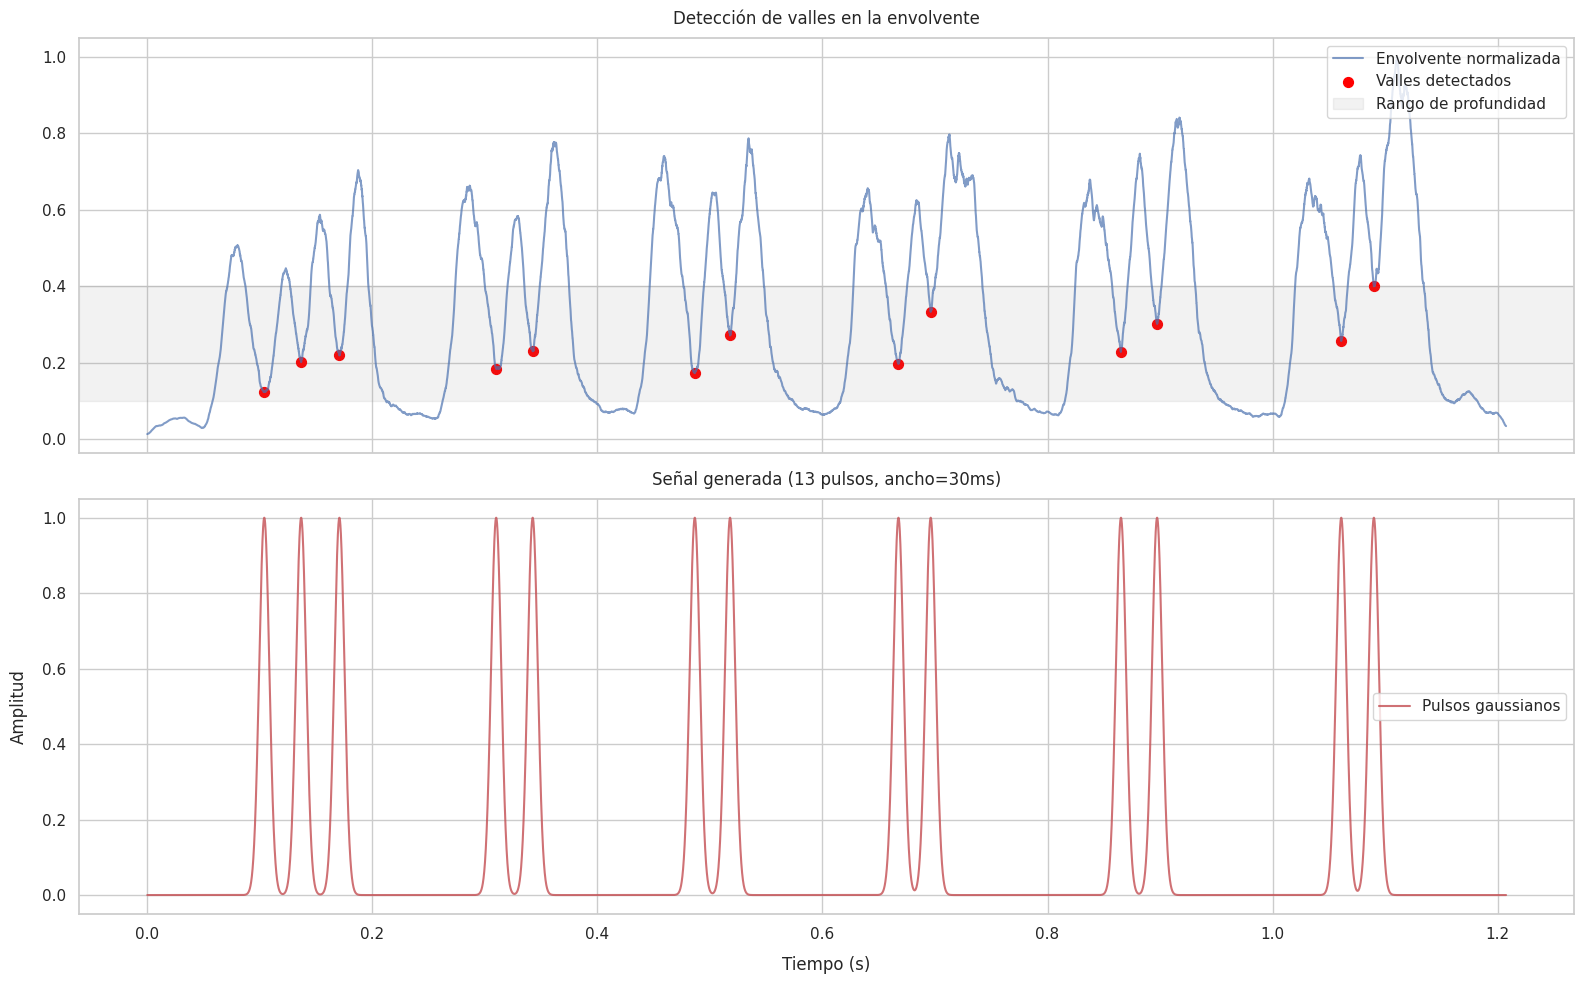

In [41]:
#####################################################
#CALCULAR LOS CORTES ---> f_0
#####################################################

# 1. Calcular envolvente mejorada (sin cambios)
def calcular_envolvente(audio, suavizado=700):
    senal_analitica = hilbert(audio)
    envolvente = np.abs(senal_analitica)
    return np.convolve(envolvente, np.ones(suavizado)/suavizado, mode='same')

envolvente_suavizada = calcular_envolvente(data_sonido, suavizado=700)

# 2. Detección de valles optimizada
def encontrar_valles(envolvente, samplerate, altura_min=0.1, altura_max=0.4, min_dist_ms=32, prominence=0.1):
    """
    Versión mejorada que:
    - Normaliza la envolvente automáticamente
    - Filtra correctamente por profundidad de valles
    - Mantiene tus parámetros originales
    """
    # Normalizar envolvente
    envolvente_norm = envolvente / np.max(envolvente)

    # Detectar todos los valles potenciales
    min_dist_muestras = int(samplerate * min_dist_ms / 1000)
    valleys, _ = find_peaks(-envolvente_norm,
                          distance=min_dist_muestras,
                          prominence=prominence)

    # Filtrar por profundidad del valle (altura original, no invertida)
    valleys_filtrados = [v for v in valleys
                        if altura_min < envolvente_norm[v] < altura_max]

    return np.array(valleys_filtrados)

# Parámetros ajustables
valleys = encontrar_valles(envolvente_suavizada, samplerate,
                         altura_min=0.1,   # Valles más profundos que 0.1 (normalizado)
                         altura_max=0.5,   # Valles menos profundos que 0.4
                         min_dist_ms=20,   # 32ms entre valles
                         prominence=0.1)   # Prominencia mínima

# 3. Generador de pulsos gaussianos
def generar_pulso_gaussiano(posicion, ancho_muestras, longitud_senal, std_dev=0.15):
    """Versión más eficiente con numpy.arange"""
    x = np.arange(longitud_senal) - posicion
    return np.exp(-(x**2)/(2*(ancho_muestras*std_dev)**2))

# Parámetros de pulsos (en segundos)
ancho_pulso_seg = 0.03  # 20ms de ancho base
ancho_pulso_muestras = int(samplerate * ancho_pulso_seg)
z_gauss = np.zeros(len(data_sonido))

for valley in valleys:
    pulso = generar_pulso_gaussiano(valley, ancho_pulso_muestras, len(data_sonido))
    z_gauss += pulso

# Normalización inteligente (preserva relación de amplitudes)
z_gauss = z_gauss / np.max(z_gauss) if np.max(z_gauss) > 0 else z_gauss

# 4. Visualización
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Gráfico superior: Envolvente y valles
ax1.plot(time, envolvente_suavizada/np.max(envolvente_suavizada),
        'b-', alpha=0.7, label='Envolvente normalizada')
ax1.scatter(valleys/samplerate, envolvente_suavizada[valleys]/np.max(envolvente_suavizada),
           c='red', marker='o', s=50, label='Valles detectados')
ax1.axhspan(ymin=0.1, ymax=0.4, color='gray', alpha=0.1, label='Rango de profundidad')
ax1.set_title('Detección de valles en la envolvente', pad=10)
ax1.legend(loc='upper right')
ax1.grid(True)

# Gráfico inferior: Pulsos generados
ax2.plot(time, z_gauss, 'r-', linewidth=1.5, alpha=0.8, label='Pulsos gaussianos')
ax2.set_title(f'Señal generada ({len(valleys)} pulsos, ancho={ancho_pulso_seg*1000:.0f}ms)', pad=10)
ax2.set_xlabel('Tiempo (s)', labelpad=10)
ax2.set_ylabel('Amplitud', labelpad=10)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

z_2=z_gauss #z_2 sera la funcion asociada a F_0

<ipython-input-42-e9d763aa36c5>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/content/drive/My Drive/horneros (drive)/Sintesis/Audios para probar/info.txt", sep="   ", header=None, names=["time", "f0"], skiprows=1)  # DataFrame original


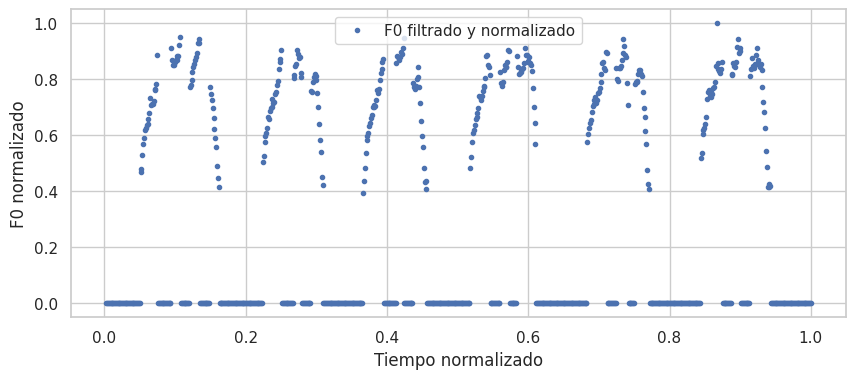

In [42]:
#####################################################
#metemos el pitch
#####################################################

import pandas as pd


# Leer el archivo .txt
df = pd.read_csv("/content/drive/My Drive/horneros (drive)/Sintesis/Audios para probar/info.txt", sep="   ", header=None, names=["time", "f0"], skiprows=1)  # DataFrame original
# info.txt es a

# Filtrar los datos (creando una copia para no modificar el original)
df_filtrado = df.copy()
df_filtrado.loc[df_filtrado['f0'] > 3500, 'f0'] = 0  # Reemplaza f0 > 8500 por 0 en la copia

# Normalizar los datos filtrados
tiempos = df_filtrado["time"] / np.max(df_filtrado["time"])  # Tiempo normalizado (0 a 1)
f_0 = df_filtrado["f0"] / np.max(df_filtrado["f0"])         # F0 normalizado (0 a 1)

# Graficar
plt.figure(figsize=(10, 4))
plt.plot(tiempos, f_0, 'o', markersize=3, label="F0 filtrado y normalizado")
plt.xlabel("Tiempo normalizado")
plt.ylabel("F0 normalizado")
plt.grid(True)
plt.legend()
plt.show()






In [ ]:
# @title Texto de título predeterminado
import numpy as np
from scipy.interpolate import interp1d

# Interpolamos f_0 a los tiempos de z_2 (sin suavizar, pero sin extrapolar)
interp_f0 = interp1d(tiempos, f_0, bounds_error=False, fill_value=np.nan)
f0_en_time = interp_f0(time)  # ahora f_0 tiene misma longitud que z_2

# Creamos la nueva señal: reemplazamos z_2 con f_0 donde f_0 está definido
z_combinado = np.where(np.isnan(f0_en_time), z_2, f0_en_time)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(time, z_2, label='Pulsos gaussianos (z_2)', alpha=0.3)
plt.plot(time, f0_en_time, '.', label='Pitch interpolado (f_0)', markersize=2)
plt.plot(time, z_combinado, label='Combinado (pitch sobre pulsos)', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.tight_layout()
plt.show()


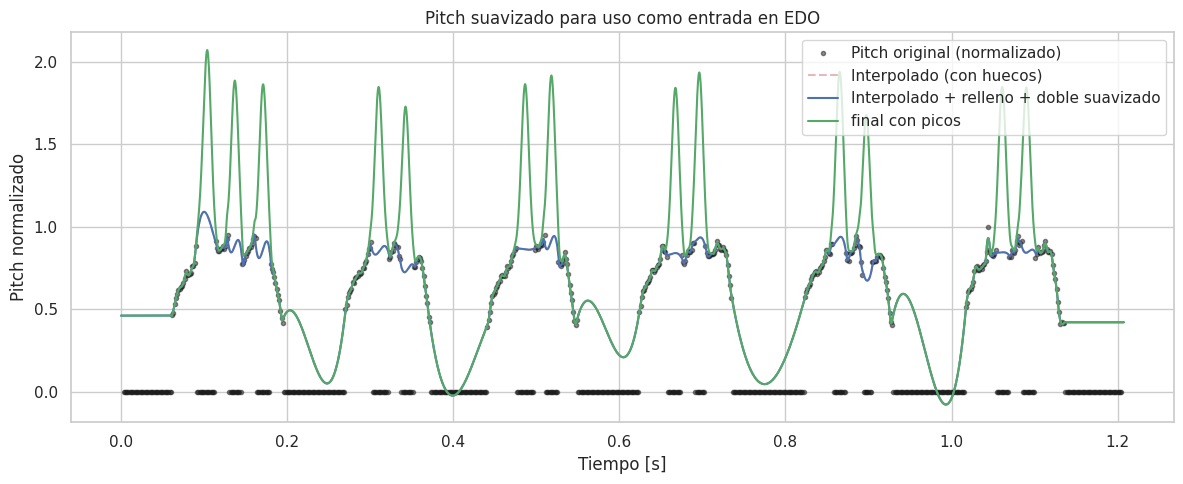

In [43]:
####################################################
# Juntamos pitch y los cortes
#####################################################


from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

# Suponemos que ya tenés:
# - tiempos_f0: tiempos del pitch (en segundos)
# - f_0: pitch normalizado, con ceros en los huecos
# - time: vector de tiempos denso donde querés interpolar
tiempos_f0 = df["time"]  # Tiempos del pitch en segundos
f_0 = df["f0"] / np.max(np.abs(df["f0"]))  # Normalizar amplitud
# --- 1. Filtrar puntos válidos (pitch > 0) ---
mask_valid = f_0 > 0
tiempos_validos = tiempos_f0[mask_valid]
f_0_valid = f_0[mask_valid]

# --- 2. Suavizado preliminar sobre los valores válidos ---
window_pre = 5  # más corto, solo para quitar oscilaciones pequeñas
poly_pre = 2
if window_pre >= len(f_0_valid):
    window_pre = len(f_0_valid) - 1
    if window_pre % 2 == 0:
        window_pre -= 1
f_0_valid_suave = savgol_filter(f_0_valid, window_pre, poly_pre)

# --- 3. Interpolación sobre los datos suavizados ---
interpolador = interp1d(tiempos_validos, f_0_valid_suave, kind='cubic',
                        bounds_error=False, fill_value=np.nan)
f_0_interpolado = interpolador(time)

# --- 4. Relleno de huecos (NaNs) ---
def rellenar_nans(y):
    nans = np.isnan(y)
    not_nans = ~nans
    return np.interp(np.arange(len(y)), np.flatnonzero(not_nans), y[not_nans])

f_0_rellenado = rellenar_nans(f_0_interpolado)

# --- 5. Suavizado final ---
window_post = 11  # más largo para una curva más lisa
poly_post = 3
if window_post >= len(f_0_rellenado):
    window_post = len(f_0_rellenado) - 1
    if window_post % 2 == 0:
        window_post -= 1
f_0_suavizado = savgol_filter(f_0_rellenado, window_post, poly_post)



z_2_con_pitch = f_0_suavizado+z_2
# --- 6. Graficar ---
plt.figure(figsize=(12, 5))
plt.plot(tiempos_f0, f_0, 'k.', label='Pitch original (normalizado)', alpha=0.5)
plt.plot(time, f_0_interpolado, 'r--', label='Interpolado (con huecos)', alpha=0.4)
plt.plot(time, f_0_suavizado, 'b-', label='Interpolado + relleno + doble suavizado')
plt.plot(time, z_2_con_pitch, 'g-', label='final con picos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Pitch normalizado')
plt.title('Pitch suavizado para uso como entrada en EDO')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



z_2_con_pitch = f_0_suavizado+z_2

In [ ]:
# @title Texto de título predeterminado
dt=1/44150.0
tiempo_total=len(data_sonido)*dt
tiempos=np.zeros(len(data_sonido))
beta=np.zeros(len(data_sonido))
f_cero=np.zeros(len(data_sonido))
amplitud=np.zeros(len(data_sonido))
tension=np.zeros(len(data_sonido))
#actividad=np.zeros(len(data_p))
#inestabilidad=np.zeros(len(data_p))
#z=z/max(z) #la normalizo de nuevo porque no estoy seguro si loe estaba


global mu
global k
global c

def sig(x):
    sx=1/(1+np.exp(-15*((x-0.0))))
    return sx

mu,k,c=100000,1,1

def ecuaciones(v, dv):
    u1,v1 = v
    dv[0]=15000*(mu*(v1-((c/mu)*u1*u1*u1-(b_temporal/mu)*u1)))
    dv[1]=-15000*(k/mu)*(u1+1*u1*u1*u1+f0_temporal/k)
    return dv

In [ ]:
# @title Texto de título predeterminado
for i in range(len(data_sonido)):
    tiempos[i]=i*dt
    amplitud[i]=z[i]
    beta[i]=z[i]   # este es el parametro que da la presurizacion
    tension[i]=1.5  # este es el parametro que da la tension
    #actividad[i]=env[i] #este es el parametro que da la actividad del musculo vs
    #if (inestabilidad[i-1]<=0):
    f_cero[i] = 3.5*z_2[i]
    #f_cero[i] = 7*sig( np.sin(1.5 * 2 * np.pi * i / period)-0.99) #si no hay fonacion, con una dada actividad se logra un garing importante
    tension[i]=0.2 + .4 * f_cero[i] # este es el parametro que da la tension

    #if(inestabilidad[i-1]>0):
    #  f_cero[i]=0.2*env[i] #si hay fonacion, se requeriria una actividad mucho mas grande para lograr el mismo nivel de gating
    # f_cero[i]=0 #si hay fonacion, se requeriria una actividad mucho mas grande para lograr el mismo nivel de gating
    #inestabilidad[i]=beta[i]-(f_cero[i]*f_cero[i])/(tension[i]*tension[i])   # este es el parametro que describe la inestabilidad del punto fijo, o sea si hay fonacion o no.

#Visualizamos
plt.figure(figsize=(14, 7))
plt.plot(z)
plt.plot(beta, label='beta')
plt.plot(f_cero, label='f_cero')
plt.plot(tension, label='tension')
plt.xlim(0,50000)
plt.legend()
plt.show()

In [ ]:
# @title Texto de título predeterminado
v=np.zeros(2)
v[0], v[1] =0.0000,0.0001

def rk4(dv,v,n,t,dt):
        v1=[]
        k1=[]
        k2=[]
        k3=[]
        k4=[]
        for x in range(0, n):
            v1.append(x)
            k1.append(x)
            k2.append(x)
            k3.append(x)
            k4.append(x)

        dt2=dt/2.0
        dt6=dt/6.0
        for x in range(0, n):
            v1[x]=v[x]
        dv(v1, k1)
        for x in range(0, n):
            v1[x]=v[x]+dt2*k1[x]
        dv(v1, k2)
        for x in range(0, n):
            v1[x]=v[x]+dt2*k2[x]
        dv(v1, k3)
        for x in range(0, n):
            v1[x]=v[x]+dt*k3[x]
        dv(v1, k4)
        for x in range(0, n):
            v1[x]=v[x]+dt*k4[x]
        for x in range(0, n):
            v[x]=v[x]+dt6*(2.0*(k2[x]+k3[x])+k1[x]+k4[x])
        return v



In [ ]:
# @title Texto de título predeterminado
n=2 #Cantidad de variables
x1=[]
y1=[]
tiempo1=[]
sonido=[]

cont1=0


for i in range(int(tiempo_total/(dt))):
    b_temporal=1.5*beta[i]
    f0_temporal=1.1*f_cero[i]
    k=0.8*tension[i]
    t=i*dt
    rk4(ecuaciones,v,n,t,dt)
    x1.append(cont1)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
    y1.append(cont1)
    tiempo1.append(cont1)
    sonido.append(cont1)
    x1[cont1]=v[0]
    y1[cont1]=v[1]
    tiempo1[cont1]=t
    sonido[cont1]=(y1[i]-(c/3)*x1[i]*x1[i]*x1[i]+beta[i]*x1[i])*beta[i]
    cont1=cont1+1

In [44]:
#####################################################
# CREAMOS RUIDO E INTEGRAMOS TODO EL MODELO CON RUIDO
#####################################################

import random  # Importamos random para el ruido

dt = 1/(2*44100.0)
tiempo_total = len(data_sonido)*dt
tiempos = np.zeros(len(data_sonido))
beta = np.zeros(len(data_sonido))
f_cero = np.zeros(len(data_sonido))
amplitud = np.zeros(len(data_sonido))
tension = np.zeros(len(data_sonido))
z = z/max(z)  # Normalización de z

global mu
global k
global c
global noise_level  # Nuevo parámetro global para el ruido

def sig(x):
    return 1/(1+np.exp(-15*((x-0.0))))

# Inicialización de parámetros
mu, k, c = 10000, 1, 0.5 #0.75
noise_level = 0.2  # ±10% de ruido 0.2

def get_k_with_noise(tension_value):
    """Función que calcula k con ruido aleatorio"""
    base_k = 0.8 * tension_value
    noise_factor = 1 + random.uniform(-noise_level, noise_level)
    return base_k * noise_factor
alpha=1
gamma = 13000 #2 * np.pi * 2000
def ecuaciones(v, dv):
    u1, v1 = v
    dv[0] = gamma * (mu*(v1-((c/mu)*u1*u1*u1-(b_temporal/mu)*u1)))
    dv[1] = -gamma * (k/mu)*(u1+alpha*u1*u1*u1+f0_temporal/k)
    return dv

# Pre-cálculo de parámetros
for i in range(len(data_sonido)):
    tiempos[i] = i*dt
    amplitud[i] = z[i]
    beta[i] = z[i]   # parámetro de presurización
    tension[i] = 0.5  # parámetro de tensión inicial
    f_cero[i] = 0.5+1.5*4.5*z_2[i]
    tension[i] = 0.3 + 1.5*z_2_con_pitch[i]## 0.5 + .4 * f_cero[i]  # actualización de tensión

# Condiciones iniciales
v = np.zeros(2)
v[0], v[1] = 0.0000, 0.0001

def rk4(dv, v, n, t, dt):
    v1 = []
    k1 = []
    k2 = []
    k3 = []
    k4 = []
    for x in range(0, n):
        v1.append(x)
        k1.append(x)
        k2.append(x)
        k3.append(x)
        k4.append(x)

    dt2 = dt/2.0
    dt6 = dt/6.0
    for x in range(0, n):
        v1[x] = v[x]
    dv(v1, k1)
    for x in range(0, n):
        v1[x] = v[x]+dt2*k1[x]
    dv(v1, k2)
    for x in range(0, n):
        v1[x] = v[x]+dt2*k2[x]
    dv(v1, k3)
    for x in range(0, n):
        v1[x] = v[x]+dt*k3[x]
    dv(v1, k4)
    for x in range(0, n):
        v1[x] = v[x]+dt*k4[x]
    for x in range(0, n):
        v[x] = v[x]+dt6*(2.0*(k2[x]+k3[x])+k1[x]+k4[x])
    return v

n = 2  # Cantidad de variables
x1 = []
y1 = []
tiempo1 = []
sonido = []
cont1 = 0

# Simulación principal con ruido
for i in range(int(tiempo_total/(dt))):
    b_temporal = 1.5*beta[i]
    f0_temporal = 1.1*f_cero[i]
    k = get_k_with_noise(tension[i])  # Aquí aplicamos el ruido
    t = i*dt
    rk4(ecuaciones, v, n, t, dt)

    # Almacenamiento de resultados
    x1.append(cont1)
    y1.append(cont1)
    tiempo1.append(cont1)
    sonido.append(cont1)
    x1[cont1] = v[0]
    y1[cont1] = v[1]
    tiempo1[cont1] = t
    sonido[cont1] = (y1[i]-(c/3)*x1[i]*x1[i]*x1[i]+beta[i]*x1[i])*beta[i]
    cont1 = cont1+1

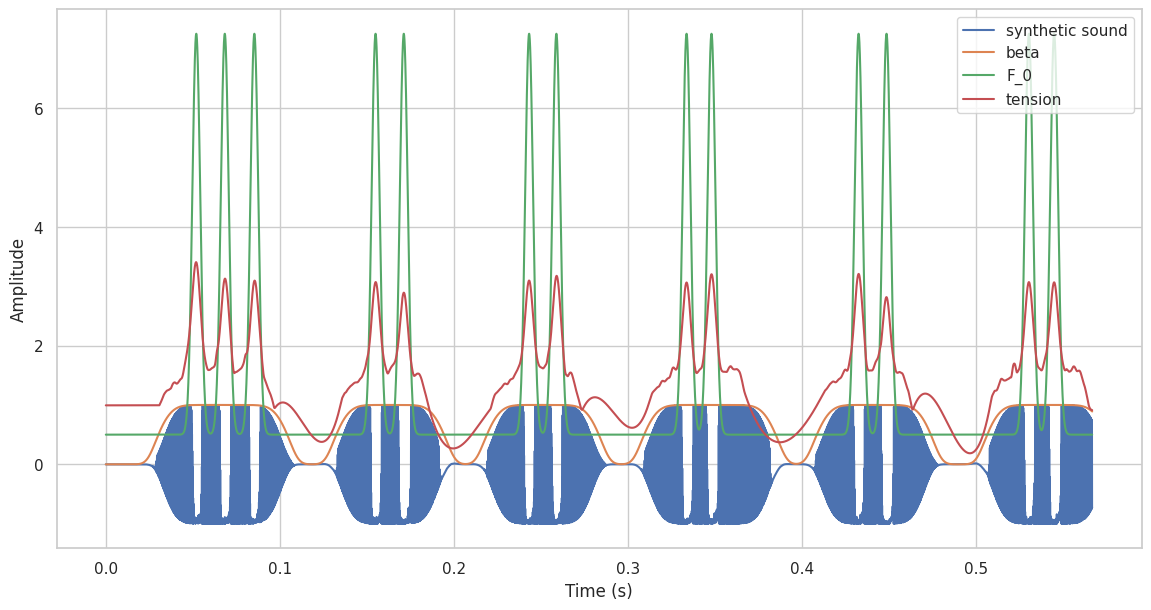

In [45]:
#####################################################
# GRAFICAMOS
#####################################################

plt.figure(figsize=(14,7))
sonido = np.asarray(sonido)[20:]/np.max(np.asarray(sonido)[20:])
plt.plot(tiempo1[:50000],sonido[:50000], label='synthetic sound')
plt.plot(tiempo1[:50000],beta[:50000], label='beta')
plt.plot(tiempo1[:50000],f_cero[:50000], label='F_0')
plt.plot(tiempo1[:50000], tension[:50000], label='tension')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
#plt.plot(tiempo1[:10000],actividad[:10000])
#plt.plot(tiempo1,inestabilidad)

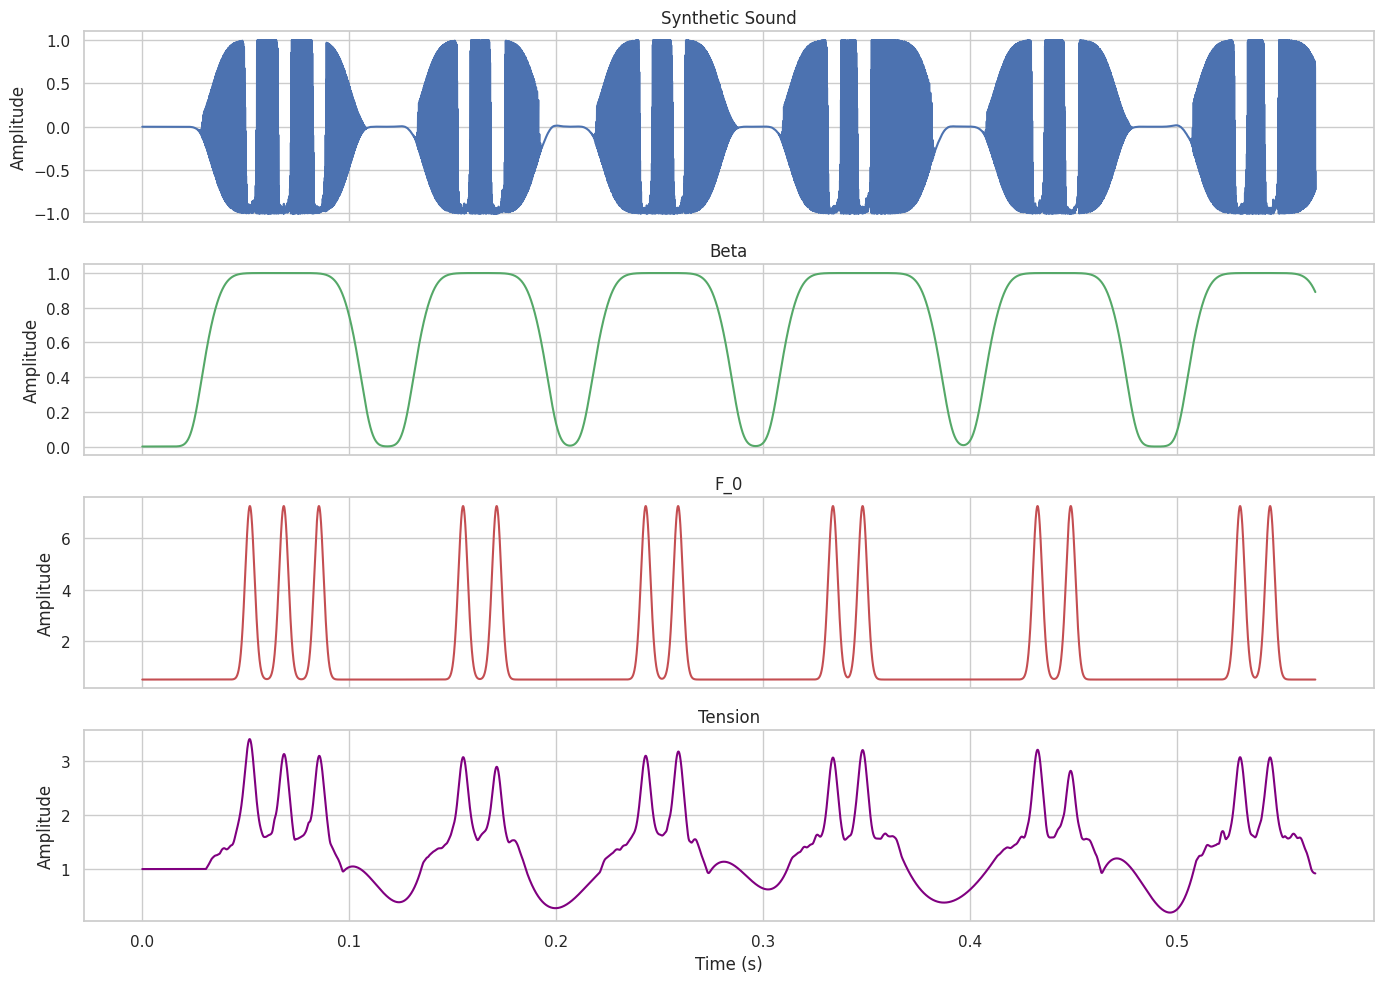

In [46]:
#####################################################
# GRAFICAMOS
#####################################################

# Crear la figura con subplots verticales (4 filas, 1 columna)
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Configurar espaciado entre subplots
plt.subplots_adjust(hspace=0.3)

# Subplot 1: sonido
axs[0].plot(tiempo1[:50000], sonido[:50000], 'b-')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Synthetic Sound')

# Subplot 2: beta
axs[1].plot(tiempo1[:50000], beta[:50000], 'g-')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Beta')

# Subplot 3: f_cero
axs[2].plot(tiempo1[:50000], f_cero[:50000], 'r-')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('F_0')

# Subplot 4: tension
axs[3].plot(tiempo1[:50000], tension[:50000], 'purple')
axs[3].set_ylabel('Amplitude')
axs[3].set_title('Tension')

# Configurar etiqueta x solo en el subplot inferior
axs[3].set_xlabel('Time (s)')

# Ajustar la disposición para optimizar espacio
plt.tight_layout()

# Mostrar la figura
plt.show()

In [48]:
#####################################################
# GUARDAMOS EL AUDIO
#####################################################


# prompt: save sonido as a wav file, sampled at 44.1 kHz. save it into the same folder I read the data from

import soundfile as sf
sf.write('/content/drive/My Drive/horneros (drive)/Sintesis/Audios para probar/sintesis_HA061020041409.wav', sonido, 44100)


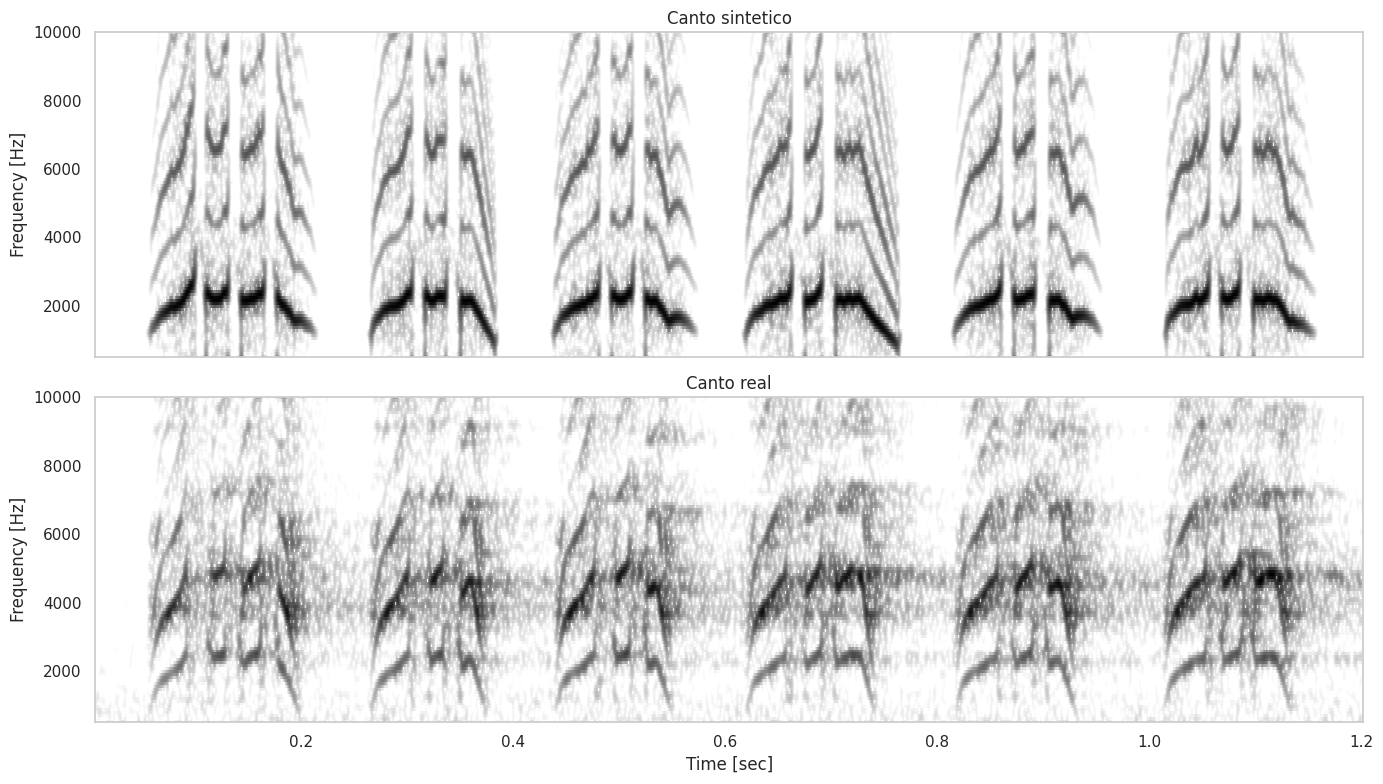

In [47]:
#####################################################
# ESPECTROGRAMA
#####################################################

sonido=np.asarray(sonido)
sonido_filtrado= sonido #senal_filtrada #sonido #senal_filtrada
#sonido=np.asarray(sonido)
sonido=sonido/max(sonido)
# Crear subgráficos: 2 filas, 1 columna, y compartir el eje X
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)  # Compartir eje X

# Espectrograma 1
f, t, Sxx = signal.spectrogram(sonido_filtrado, fs=44100, window=('gaussian', 64), nperseg=512, noverlap=510, scaling='spectrum')
Sxx = np.clip(Sxx, a_min=np.amax(Sxx) / 10**5, a_max=np.amax(Sxx))
ax[0].pcolormesh(t, f, np.log10(Sxx), rasterized=True, cmap=plt.get_cmap('Greys'))
ax[0].set_ylim(500, 10000)
#ax[0].set_xlim(0, 0.45)
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_title('Canto sintetico')

# Espectrograma 2
f, t, Sxx = signal.spectrogram(data_sonido, fs=44100, window=('gaussian', 64), nperseg=512, noverlap=510, scaling='spectrum')
Sxx = np.clip(Sxx, a_min=np.amax(Sxx) / 10**5, a_max=np.amax(Sxx))
ax[1].pcolormesh(t, f, np.log10(Sxx), rasterized=True, cmap=plt.get_cmap('Greys'))
ax[1].set_ylim(500, 10000)
ax[1].set_xlabel('Time [sec]')
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_title('Canto real')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.grid(True)
plt.show()

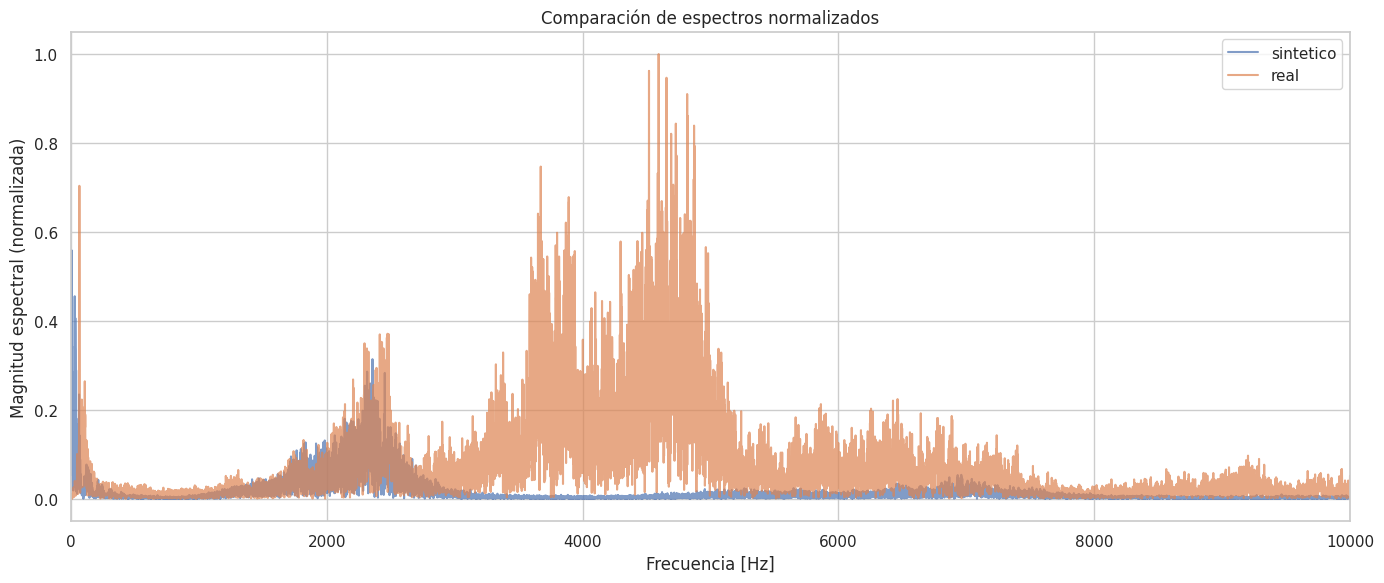

In [ ]:
#####################################################
# CONTENIDO EN FRECUENCIA
#####################################################

from scipy.fft import fft, fftfreq

# Frecuencia de muestreo
fs = 44150

# --- Señal 1 ---
sonido = np.asarray(sonido)
sonido = sonido / np.max(np.abs(sonido))
n1 = len(sonido)
f1 = fftfreq(n1, 1/fs)
mask1 = f1 > 0
fft1 = np.abs(fft(sonido))
fft1 = fft1 / np.max(fft1)  # Normalizar espectro

# --- Señal 2 ---
data_sonido = np.asarray(data_sonido)
data_sonido = data_sonido / np.max(np.abs(data_sonido))
n2 = len(data_sonido)
f2 = fftfreq(n2, 1/fs)
mask2 = f2 > 0
fft2 = np.abs(fft(data_sonido))
fft2 = fft2 / np.max(fft2)  # Normalizar espectro

# --- Plot ---
plt.figure(figsize=(14, 6))
plt.plot(f1[mask1], fft1[mask1], label='sintetico', alpha=0.7)
plt.plot(f2[mask2], fft2[mask2], label='real', alpha=0.7)
plt.xlim(0, 10000)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud espectral (normalizada)')
plt.title('Comparación de espectros normalizados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [39]:
#####################################################
# FILTRAMOS POR MEDIO DE LA FFT
#####################################################


import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# 1. Leer archivo de audio
fs, audio = wav.read('/content/drive/My Drive/horneros (drive)/Sintesis/Audios para probar/sintesis_HA061020041409.wav')
audio = audio.astype(np.float32)

# 2. Si es estéreo, tomar un solo canal
if audio.ndim > 1:
    audio = audio[:, 0]

# 3. Aplicar la transformada de Fourier
fft_audio = np.fft.rfft(audio)
freqs = np.fft.rfftfreq(len(audio), 1/fs)

# 4. Atenuar frecuencias alrededor de la fundamental (ejemplo: 300 Hz ± 20 Hz)
#f_center = 4300  # frecuencia fundamental estimada
#bandwidth = 1200

#mask = (freqs > f_center - bandwidth) & (freqs < f_center + bandwidth)
#fft_audio[mask] *= 4  # atenúa esa región al 30%

f_center = 2300  # frecuencia fundamental estimada
bandwidth = 1000

mask = (freqs > f_center - bandwidth) & (freqs < f_center + bandwidth)
fft_audio[mask] *= 0.1  # atenúa esa región al 30%

# 5. Volver al dominio temporal
audio_filtered = np.fft.irfft(fft_audio)

# 6. Guardar resultado
audio_filtered = np.int16(audio_filtered / np.max(np.abs(audio_filtered)) * 32767)
import soundfile as sf
sf.write('/content/drive/My Drive/horneros (drive)/Sintesis/Audios para probar/sintesis_HA061020041409_filtrado.wav', audio_filtered, 44100)


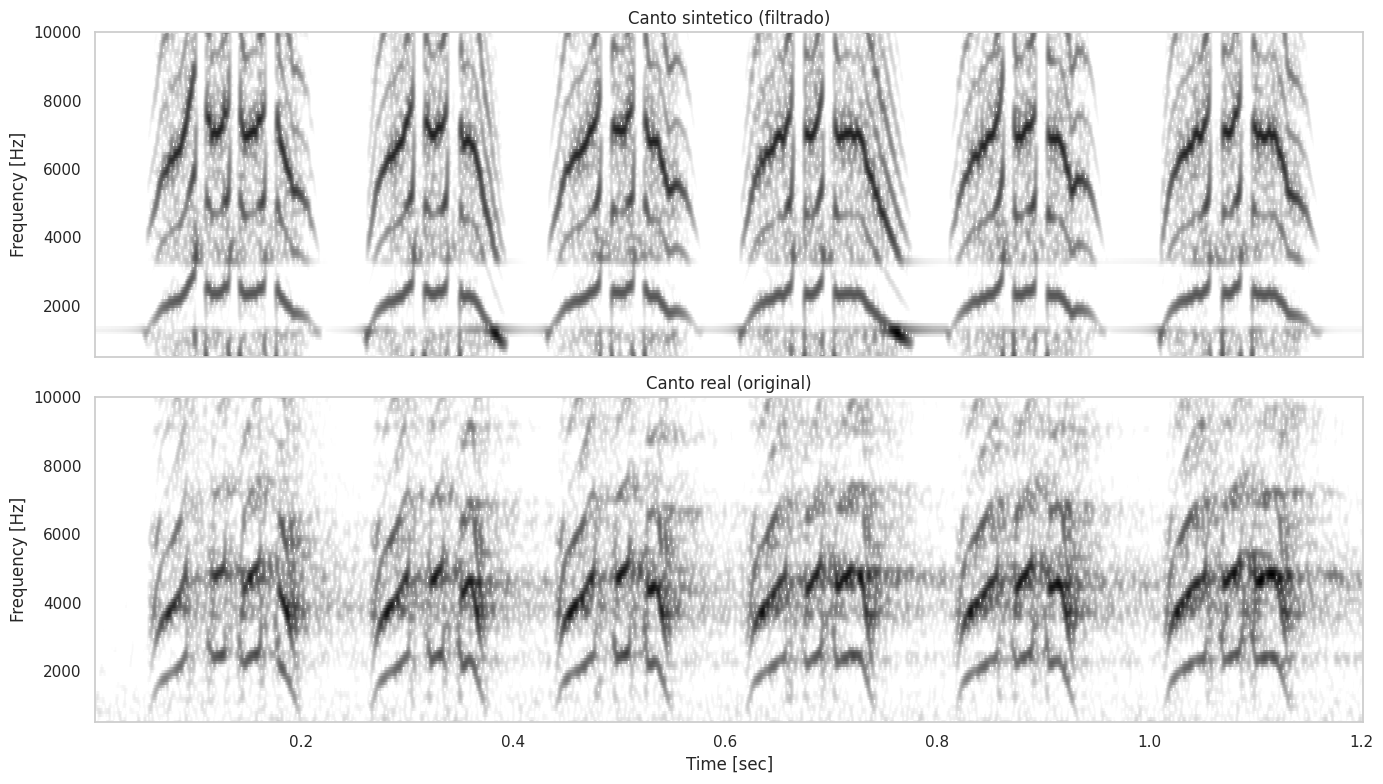

In [38]:
from scipy import signal

samplerate_data, data_sonido = wavfile.read('/content/drive/My Drive/horneros (drive)/Sintesis/Audios para probar/HA061020041409-solo_hembra_recorte.wav')

# Convertir a arrays de numpy y normalizar
sonido = np.asarray(audio_filtered, dtype=np.float32)
sonido = sonido / np.max(np.abs(sonido))  # normalizar entre -1 y 1
data_sonido = np.asarray(data_sonido, dtype=np.float32)
data_sonido = data_sonido / np.max(np.abs(data_sonido))

# Crear subgráficos: 2 filas, 1 columna, compartir eje X
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Espectrograma del sonido filtrado
f, t, Sxx = signal.spectrogram(sonido, fs=fs, window=('gaussian', 64), nperseg=512, noverlap=510, scaling='spectrum')
Sxx = np.clip(Sxx, a_min=np.amax(Sxx) / 10**5, a_max=np.amax(Sxx))
ax[0].pcolormesh(t, f, np.log10(Sxx), rasterized=True, cmap=plt.get_cmap('Greys'))
ax[0].set_ylim(500, 10000)
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_title('Canto sintetico (filtrado)')

# Espectrograma del sonido original
f, t, Sxx = signal.spectrogram(data_sonido, fs=fs, window=('gaussian', 64), nperseg=512, noverlap=510, scaling='spectrum')
Sxx = np.clip(Sxx, a_min=np.amax(Sxx) / 10**5, a_max=np.amax(Sxx))
ax[1].pcolormesh(t, f, np.log10(Sxx), rasterized=True, cmap=plt.get_cmap('Greys'))
ax[1].set_ylim(500, 10000)
ax[1].set_xlabel('Time [sec]')
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_title('Canto real (original)')

# Ajustar diseño
plt.tight_layout()
plt.grid(True)
plt.show()


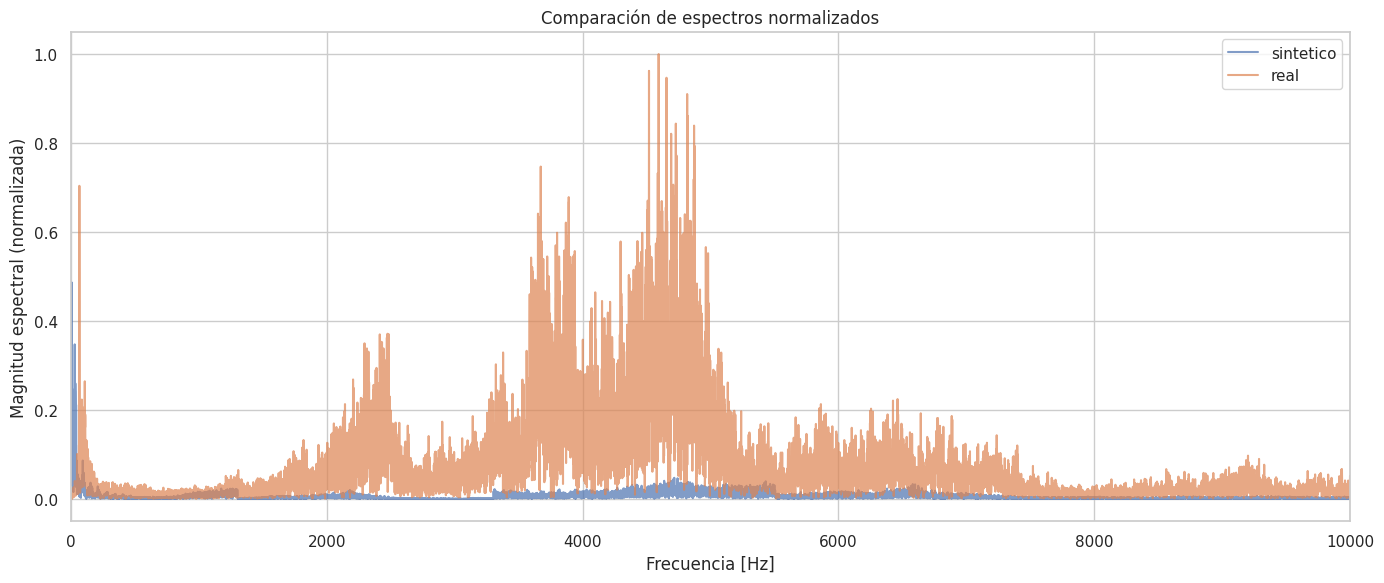

In [25]:
from scipy.fft import fft, fftfreq
# Frecuencia de muestreo
fs = 44150

# --- Señal 1 ---
sonido = np.asarray(sonido)
sonido = sonido / np.max(np.abs(sonido))
n1 = len(sonido)
f1 = fftfreq(n1, 1/fs)
mask1 = f1 > 0
fft1 = np.abs(fft(sonido))
fft1 = fft1 / np.max(fft1)  # Normalizar espectro

# --- Señal 2 ---
data_sonido = np.asarray(data_sonido)
data_sonido = data_sonido / np.max(np.abs(data_sonido))
n2 = len(data_sonido)
f2 = fftfreq(n2, 1/fs)
mask2 = f2 > 0
fft2 = np.abs(fft(data_sonido))
fft2 = fft2 / np.max(fft2)  # Normalizar espectro

# --- Plot ---
plt.figure(figsize=(14, 6))
plt.plot(f1[mask1], fft1[mask1], label='sintetico', alpha=0.7)
plt.plot(f2[mask2], fft2[mask2], label='real', alpha=0.7)
plt.xlim(0, 10000)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud espectral (normalizada)')
plt.title('Comparación de espectros normalizados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()